In [1]:
import pandas as pd

In [2]:
!pip install matplotlib

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os

In [4]:
df_description = pd.read_csv(r"C:\Users\ABC\Downloads\MicrosoftEngageProject\Data Description.csv")
df = pd.read_csv(r"C:\Users\ABC\Downloads\MicrosoftEngageProject\CO2 Emissions_Canada.csv")

In [5]:
df.head

<bound method NDFrame.head of        Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                         

In [6]:
df_description

,Understanding the Data,Unnamed: 1
0,Model,4WD/4X4 = Four-wheel drive
1,NaN,AWD = All-wheel drive
2,NaN,FFV = Flexible-fuel vehicle
3,NaN,SWB = Short wheelbase
4,NaN,LWB = Long wheelbase
5,NaN,EWB = Extended wheelbase
6,Transmission,A = automatic
7,NaN,AM = automated manual
8,NaN,AS = automatic with select shift
9,NaN,AV = continuously variable


In [7]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
## differentiate trasmission into A, M, AM, AS, AV
df['Transmission Type'] = df['Transmission'].apply(lambda x: x[0])

<Figure size 1296x432 with 0 Axes>

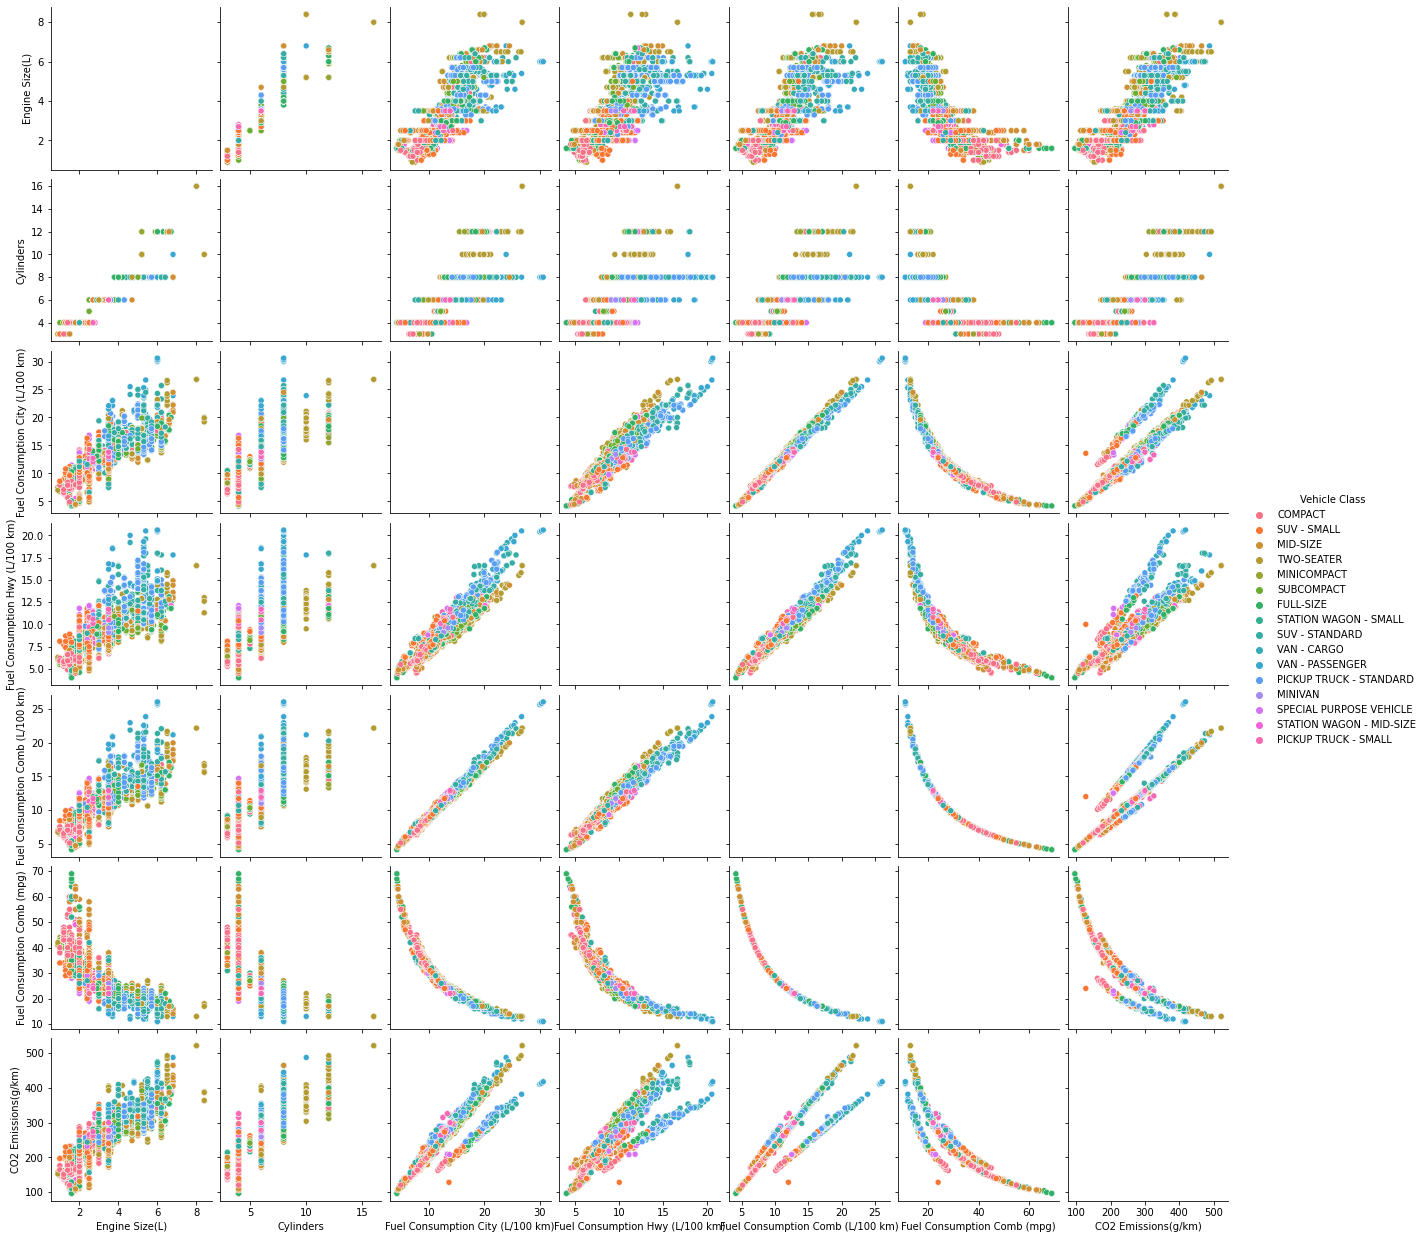

In [9]:
plt.figure(figsize=(18,6))
sns.pairplot(df, hue='Vehicle Class', diag_kind={'kde':{'bw':1}})

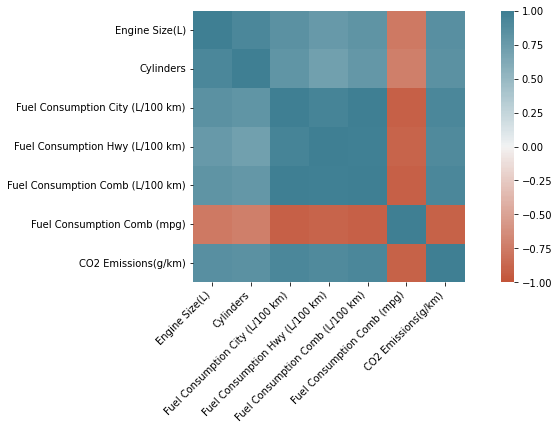

In [10]:
plt.figure(figsize=(13,5))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

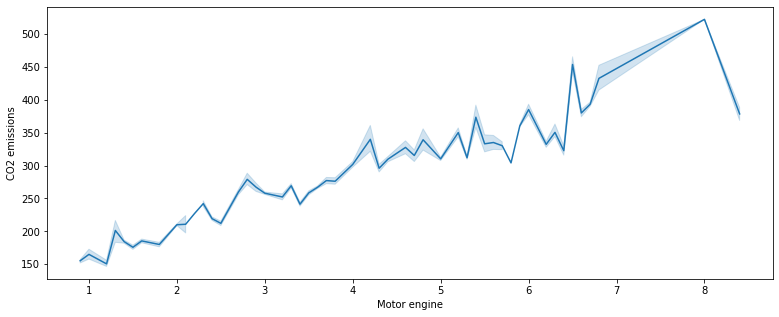

In [11]:
plt.figure(figsize=(13,5)) 
sns.lineplot(x=df['Engine Size(L)'], y=df['CO2 Emissions(g/km)']) 
plt.xlabel('Motor engine') 
plt.ylabel('CO2 emissions') 
plt.show()

In [12]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [13]:
engine= df[['Engine Size(L)']]
co2 = df[['CO2 Emissions(g/km)']]

In [14]:
engine_train, engine_test, co2_train, co2_test = train_test_split(engine, co2, test_size=0.2, random_state=42)

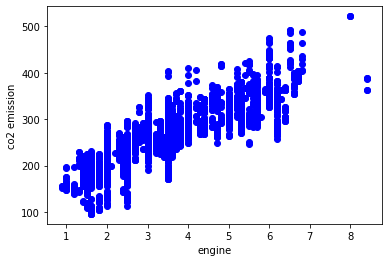

In [15]:
plt.scatter(engine_train, co2_train, color='blue')
plt.xlabel('engine')
plt.ylabel('co2 emission')
plt.show()

In [16]:
print(engine.shape,co2.shape)

(7385, 1) (7385, 1)


In [17]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

linear.fit(engine_train, co2_train)

LinearRegression()

In [18]:
co2train_pred = linear.predict(engine_train)

In [19]:
#Mean squared error
print(mean_squared_error(co2_train, co2train_pred))

941.7163581594913


In [20]:
#Root mean square error
print(np.sqrt(mean_squared_error(co2_train, co2train_pred)))

30.687397383282462


In [21]:
#R2-score
print(r2_score(co2_train, co2train_pred))

0.7245276280573065


In [22]:
temp = linear.coef_*engine_train + linear.intercept_

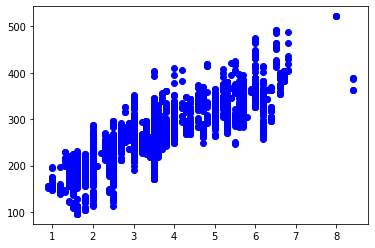

In [23]:
plt.scatter(engine_train, co2_train, color='blue')


In [24]:
engine_train['Engine Size(L)']

6590    3.0
6274    4.0
2251    3.0
3149    3.4
4362    2.0
       ... 
5191    2.0
5226    3.5
5390    3.5
860     2.5
7270    4.0
Name: Engine Size(L), Length: 5908, dtype: float64

In [25]:
engine_test['Engine Size(L)']

7261    3.0
4489    4.4
1539    6.2
3532    5.3
6418    4.0
       ... 
7185    2.0
1740    2.0
4609    1.4
1844    3.5
5154    2.0
Name: Engine Size(L), Length: 1477, dtype: float64

In [26]:
train = engine_train['Engine Size(L)']
temp = temp['Engine Size(L)']

Text(0, 0.5, 'co2 emission')

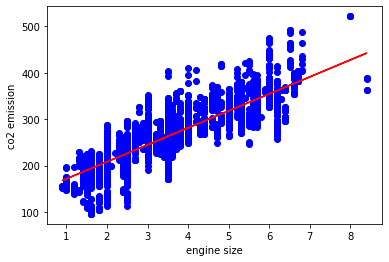

In [27]:
plt.scatter(engine_train, co2_train, color='blue')
plt.plot(train, temp, c='r')
plt.xlabel('engine size')
plt.ylabel('co2 emission')

In [28]:
co2test_pred = linear.predict(engine_test)

In [29]:
print(r2_score(co2_test, co2test_pred))

0.7238115822302343


In [30]:
score = linear.score(engine_test, co2_test)

In [31]:
score

0.7238115822302343

In [32]:
#Mean squared error
print(mean_squared_error(co2_test,co2test_pred))

949.9852533375362


In [33]:
#Root mean square error
print(np.sqrt(mean_squared_error(co2_test, co2test_pred)))

30.821830791462343


In [34]:
linear.coef_

array([[36.61217814]])

In [35]:
linear.intercept_

array([135.05657623])

In [36]:
engine_train.shape, temp.shape

((5908, 1), (5908,))

In [37]:
temp1 = linear.coef_*engine_test + linear.intercept_

In [38]:
test = engine_test['Engine Size(L)']
temp1 = temp1['Engine Size(L)']

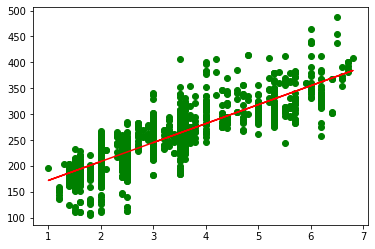

In [39]:
plt.scatter(engine_test, co2_test, color='green')
plt.plot(test, temp1, c='r')

In [40]:
engine_test.shape, temp1.shape

((1477, 1), (1477,))

In [41]:
import pickle 
file = open('CO2_Emission_regression_model.pkl','wb')
pickle.dump(linear, file)